In [1]:
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset
dataset = pd.read_csv("Abalone_Data.csv")

In [3]:
dataset.head()

,Gender,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,Male,70,53,18,45.1,19.9,9.7,14.0,7
1,Female,106,84,27,135.4,51.3,28.3,42.0,9
2,Male,88,73,25,103.2,43.1,22.8,31.0,10
3,Infant,66,51,16,41.0,17.9,7.9,11.0,7
4,Infant,85,60,19,70.3,28.2,15.5,24.0,8


In [4]:
#Replacing the Rings column with Age
dataset['age'] = dataset['Rings']+1.5
dataset.drop('Rings', axis = 1, inplace = True)

In [5]:
dataset.head()

,Gender,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,age
0,Male,70,53,18,45.1,19.9,9.7,14.0,8.5
1,Female,106,84,27,135.4,51.3,28.3,42.0,10.5
2,Male,88,73,25,103.2,43.1,22.8,31.0,11.5
3,Infant,66,51,16,41.0,17.9,7.9,11.0,8.5
4,Infant,85,60,19,70.3,28.2,15.5,24.0,9.5


In [6]:
#Checking for null values in the dataset
dataset.isnull().sum()

Gender            0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
age               0
dtype: int64

In [7]:
#Splitting the data into independent and dependent variables
x = dataset.iloc[:,0:8].values
y = dataset.iloc[:,8].values

In [8]:
x

array([['Male', 70, 53, ..., 19.9, 9.7, 14.0],
       ['Female', 106, 84, ..., 51.3, 28.3, 42.0],
       ['Male', 88, 73, ..., 43.1, 22.8, 31.0],
       ...,
       ['Male', 120, 95, ..., 105.1, 57.5, 61.6],
       ['Female', 125, 97, ..., 106.2, 52.2, 59.2],
       ['Male', 142, 111, ..., 189.1, 75.3, 99.0]], dtype=object)

In [9]:
y

array([ 8.5, 10.5, 11.5, ..., 10.5, 11.5, 13.5])

In [10]:
#Performing LabelEncoding on Gender column
from sklearn.preprocessing import LabelEncoder
lb1 = LabelEncoder()
x[:,0] = lb1.fit_transform(x[:,0])

In [11]:
#Performing OneHotEncoding on Gender column
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder(categorical_features = [0])
x = one.fit_transform(x).toarray()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [12]:
#Removing dummy variable
x = x[:,1:]

In [13]:
#Training the data model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [14]:
#Fitting Linear Regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
ypred =regressor.predict(x_test)

In [16]:
ypred

array([12.89485586, 10.41940323,  8.82942916, ...,  7.52591983,
       10.24612522,  9.31069908])

In [17]:
ypred1 = regressor.predict([[0,1,86,70,22,81.2,33.5,16.2,27]])

In [18]:
ypred1

array([11.04124302])

In [19]:
ypred2 = regressor.predict([[0,1,98,76,27,108.3,43.5,19,38]])

In [20]:
ypred2

array([12.11956884])

In [21]:
#Calculating accuracy
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.5199393484842187

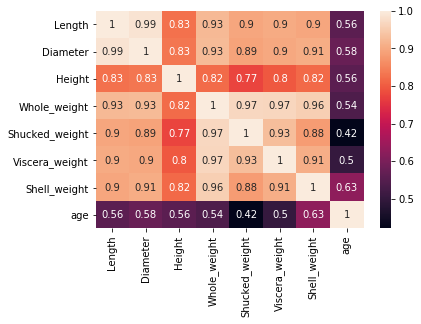

In [22]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True)

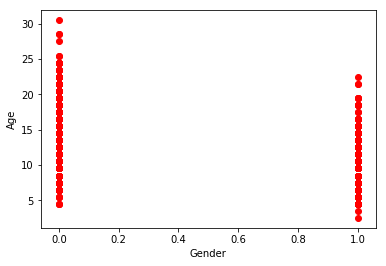

In [23]:
plt.scatter(x_train[:,0],y_train,color='red')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

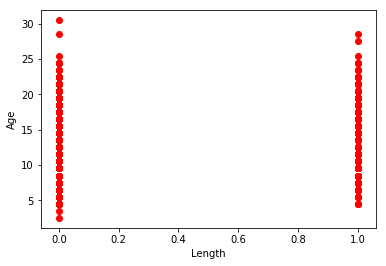

In [24]:
plt.scatter(x_train[:,1],y_train,color='red')
plt.xlabel('Length')
plt.ylabel('Age')
plt.show()

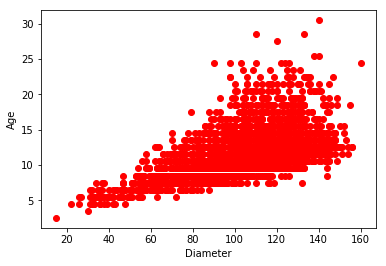

In [25]:
plt.scatter(x_train[:,2],y_train,color='red')
plt.xlabel('Diameter')
plt.ylabel('Age')
plt.show()

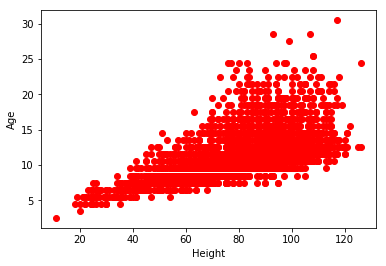

In [26]:
plt.scatter(x_train[:,3],y_train,color='red')
plt.xlabel('Height')
plt.ylabel('Age')
plt.show()

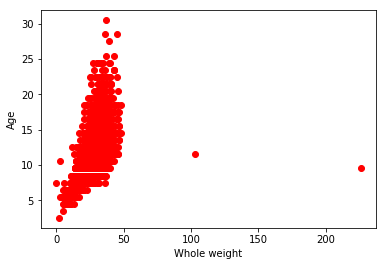

In [27]:
plt.scatter(x_train[:,4],y_train,color='red')
plt.xlabel('Whole weight')
plt.ylabel('Age')
plt.show()

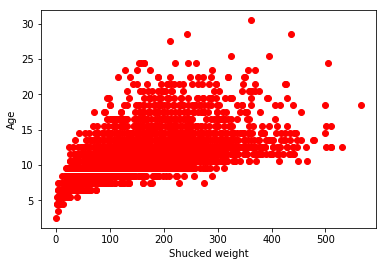

In [28]:
plt.scatter(x_train[:,5],y_train,color='red')
plt.xlabel('Shucked weight')
plt.ylabel('Age')
plt.show()

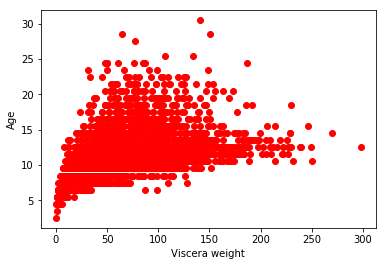

In [29]:
plt.scatter(x_train[:,6],y_train,color='red')
plt.xlabel('Viscera weight')
plt.ylabel('Age')
plt.show()

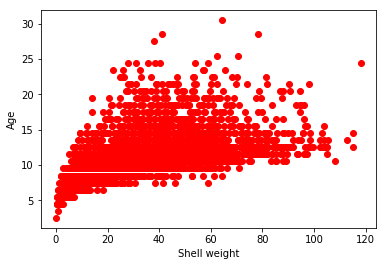

In [30]:
plt.scatter(x_train[:,7],y_train,color='red')
plt.xlabel('Shell weight')
plt.ylabel('Age')
plt.show()

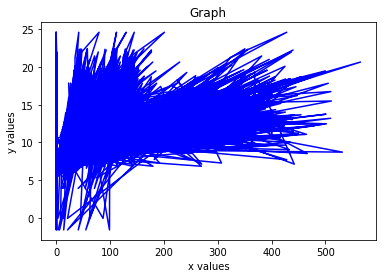

In [31]:
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('Graph')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()